<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
import wget

In [2]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite'

In [3]:
m4_survey_data = wget.download(url)

Connect to the database.


In [4]:
import sqlite3
conn = sqlite3.connect(m4_survey_data) # open a database connection

Import pandas module.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Demo: How to run an sql query


In [6]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [7]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [8]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [9]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

In [10]:
table_name = 'Gender'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "Gender" (
"Respondent" INTEGER,
  "Gender" TEXT
)


# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


In [11]:
# your code goes here
QUERY = '''
SELECT * 
FROM master
'''
df = pd.read_sql_query(QUERY,conn)
df

,index,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,...,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,Age,Trans,Dependents,SurveyLength,SurveyEase
0,0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,Less than once per month or monthly,Yes,"No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,22.0,No,No,Appropriate in length,Easy
1,1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,...,Less than once per month or monthly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,23.0,No,No,Appropriate in length,Neither easy nor difficult
2,2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...",Neutral,Somewhat more welcome now than last year,28.0,No,Yes,Appropriate in length,Easy
3,3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,26.0,No,No,Appropriate in length,Neither easy nor difficult
4,4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,A few times per week,"No, I didn't know that Stack Overflow had a jo...","No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,29.0,No,No,Appropriate in length,Easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11393,11393,25136,I am a developer by profession,Yes,Never,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,None,"No, I knew that Stack Overflow had a job board...","No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,36.0,No,No,Appropriate in length,Difficult
11394,11394,25137,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Poland,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,I have never participated in Q&A on Stack Over...,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are",Neutral,A lot more welcome now than last year,25.0,No,No,Appropriate in length,Neither easy nor difficult
11395,11395,25138,I am a developer by profession,Yes,Less than once per year,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,I have never participated in Q&A on Stack Over...,Yes,"No, I've heard of them, but I am not part of a...",Neutral,A lot more welcome now than last year,34.0,No,Yes,Too long,Easy
11396,11396,25141,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of LOWER quality than prop...",Employed full-time,Switzerland,No,"Secondary school (e.g. American high school, G...",...,Daily or almost daily,Yes,"No, I've heard of them, but I am not part of a...","Yes, somewhat",Somewhat less welcome now than last year,25.0,No,No,Appropriate in length,Easy


In [12]:
QUERY = '''
SELECT devtype, count(respondent) as Respondents
FROM DevType
GROUP BY devtype
ORDER BY Respondents DESC
'''
df_devtype = pd.read_sql_query(QUERY,conn)
df_devtype

,DevType,Respondents
0,"Developer, full-stack",6928
1,"Developer, back-end",6290
2,"Developer, front-end",3920
3,"Developer, desktop or enterprise applications",2575
4,"Developer, mobile",1959
5,DevOps specialist,1639
6,Database administrator,1413
7,System administrator,1202
8,Designer,988
9,"Developer, QA or test",911


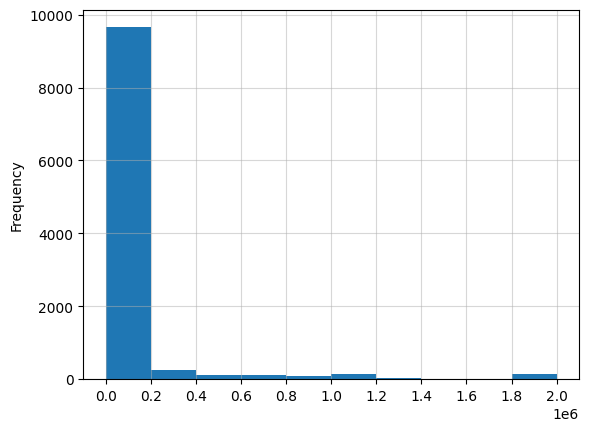

In [13]:
count, bins = np.histogram(df['ConvertedComp'].dropna())
hist = df['ConvertedComp'].plot(kind='hist', xticks=bins) 
plt.grid(alpha=0.5)

### Box Plots


Plot a box plot of `Age.`


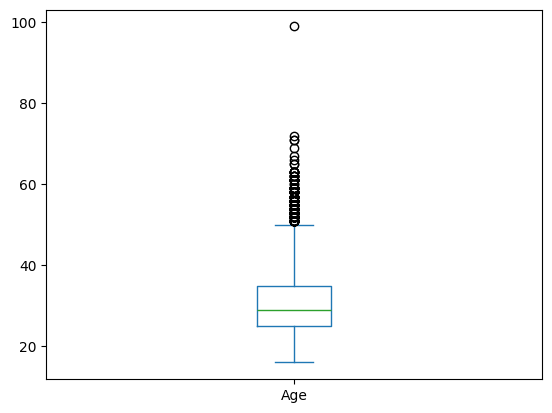

In [14]:
# your code goes here
box = df['Age'].plot(kind='box')


## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


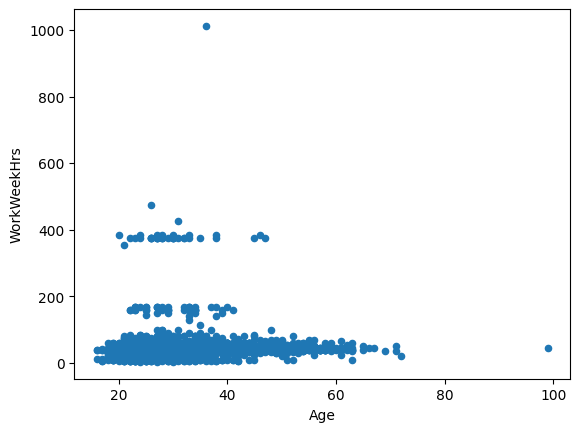

In [15]:
# your code goes here
scatter_plt = df.plot(kind='scatter', x='Age', y='WorkWeekHrs')


### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


In [16]:
QUERY = """
SELECT Age, WorkWeekHrs, CodeRevHrs
FROM master
group by age
order by age
"""
df = pd.read_sql_query(QUERY,conn)
df

,Age,WorkWeekHrs,CodeRevHrs
0,NaN,45.0,5.00
1,16.0,40.0,1.00
2,17.0,5.0,1.50
3,18.0,42.0,1.00
4,19.0,45.0,10.00
5,20.0,24.0,2.00
6,21.0,37.0,NaN
7,22.0,80.0,NaN
8,23.0,32.0,12.00
9,24.0,40.0,NaN


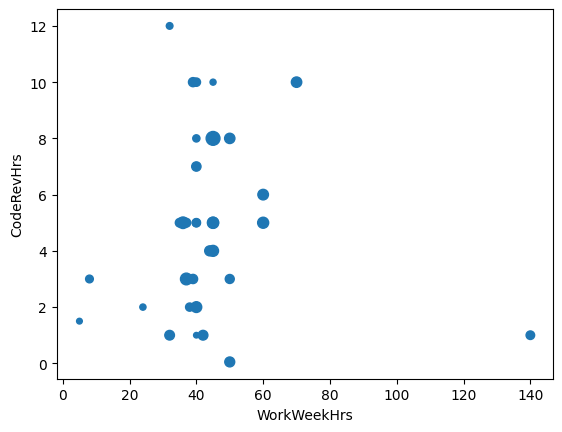

In [17]:
# your code goes here
bbl = df.plot(kind='scatter', x='WorkWeekHrs', y='CodeRevHrs', s='Age')

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


In [18]:
QUERY = """
SELECT *
FROM DatabaseDesireNextYear
"""
db_df = pd.read_sql_query(QUERY,conn)
db_df

,Respondent,DatabaseDesireNextYear
0,4,MySQL
1,4,SQLite
2,9,PostgreSQL
3,9,Redis
4,9,SQLite
...,...,...
29570,25141,Elasticsearch
29571,25141,MongoDB
29572,25141,Microsoft SQL Server
29573,25141,Redis


In [19]:
QUERY = """
SELECT DatabaseDesireNextYear, COUNT(Respondent) as Respondents 
FROM DatabaseDesireNextYear
GROUP BY DatabaseDesireNextYear
ORDER BY Respondents DESC
"""
db_df = pd.read_sql_query(QUERY,conn, index_col='DatabaseDesireNextYear').head()
db_df

,Respondents
DatabaseDesireNextYear,
PostgreSQL,4328
MongoDB,3649
Redis,3331
MySQL,3281
Elasticsearch,2856


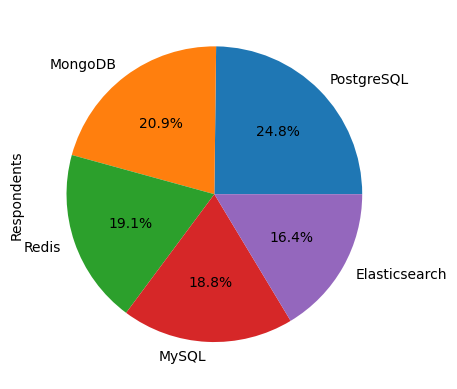

In [20]:
db_df['Respondents'].plot(kind='pie', autopct='%1.1f%%')
plt.show()

In [21]:
# your code goes here
QUERY = """
SELECT * 
FROM LanguageDesireNextYear
"""
lang_df = pd.read_sql_query(QUERY,conn)

lang_df.head()

,Respondent,LanguageDesireNextYear
0,4,C
1,4,C#
2,4,JavaScript
3,4,SQL
4,9,Bash/Shell/PowerShell


In [22]:
QUERY = """
SELECT LanguageDesireNextYear, COUNT(Respondent) as Respondents 
FROM LanguageDesireNextYear
GROUP BY LanguageDesireNextYear
ORDER BY Respondents DESC
"""
desirelang_df = pd.read_sql_query(QUERY,conn, index_col='LanguageDesireNextYear').head()
desirelang_df

,Respondents
LanguageDesireNextYear,
JavaScript,6630
HTML/CSS,5328
Python,5239
SQL,5012
TypeScript,4088


In [23]:
QUERY = """
SELECT LanguageWorkedWith, COUNT(Respondent) AS Respondents
FROM LanguageWorkedWith
GROUP BY LanguageWorkedWith
ORDER BY RespondentS DESC
"""
lang_df = pd.read_sql_query(QUERY,conn, index_col='LanguageWorkedWith')
lang_df

,Respondents
LanguageWorkedWith,
JavaScript,8687
HTML/CSS,7830
SQL,7106
Bash/Shell/PowerShell,4642
Python,4542
Java,4506
C#,4288
TypeScript,3232
PHP,2913


<Axes: ylabel='Respondents'>

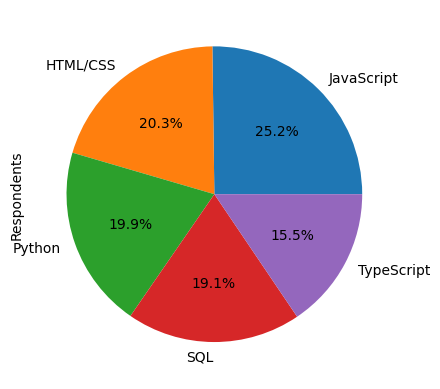

In [24]:
desirelang_df['Respondents'].plot(kind='pie', autopct='%1.1f%%')

In [25]:
QUERY = """
SELECT LanguageWorkedWith, COUNT(Respondent) AS Respondents
FROM LanguageWorkedWith
GROUP BY LanguageWorkedWith
ORDER BY RespondentS DESC
"""
lang_df = pd.read_sql_query(QUERY,conn, index_col='LanguageWorkedWith')
lang_df

,Respondents
LanguageWorkedWith,
JavaScript,8687
HTML/CSS,7830
SQL,7106
Bash/Shell/PowerShell,4642
Python,4542
Java,4506
C#,4288
TypeScript,3232
PHP,2913


In [26]:
QUERY = """
SELECT databaseWorkedWith, COUNT(Respondent) AS Respondents
FROM DatabaseWorkedWith
GROUP BY DatabaseWorkedWith
ORDER BY RespondentS DESC

"""
db_df = pd.read_sql_query(QUERY,conn, index_col='DatabaseWorkedWith')
db_df.head()

,Respondents
DatabaseWorkedWith,
MySQL,5469
Microsoft SQL Server,4110
PostgreSQL,4097
SQLite,3248
MongoDB,3016


### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


In [27]:
QUERY = """
SELECT WorkWeekHrs, CodeRevHrs, Age
FROM master
WHERE (AGE >=30) AND (AGE<=35)
"""
df_stacked = pd.read_sql_query(QUERY,conn)
df_stacked

,WorkWeekHrs,CodeRevHrs,Age
0,8.0,3.0,31.0
1,40.0,2.0,34.0
2,40.0,2.0,32.0
3,42.0,15.0,34.0
4,40.0,2.0,33.0
...,...,...,...
2937,42.0,4.0,32.0
2938,50.0,2.0,32.0
2939,56.0,14.0,32.0
2940,40.0,5.0,34.0


In [28]:
df_stacked_groups = df_stacked.pivot_table(index='CodeRevHrs', columns='Age', values='WorkWeekHrs', aggfunc=['median'])
df_stacked_groups

median                                 
Age          30.0   31.0   32.0   33.0  34.0  35.0
CodeRevHrs                                        
0.00         42.0  40.00   42.0   37.5   NaN  37.0
0.50         40.0  38.75   38.0   45.0   NaN  40.0
1.00         40.0  40.00   40.0   40.0  40.0  40.0
1.50         45.0    NaN   50.0   42.0   NaN   NaN
2.00         40.0  40.00   40.0   40.0  40.0  40.0
2.50          NaN    NaN   40.0    NaN   NaN   NaN
3.00         40.0  40.00   40.0   40.0  40.0  40.0
4.00         40.0  40.00   40.0   40.0  40.0  40.0
5.00         40.0  40.00   40.0   40.0  40.0  40.0
6.00         40.0  40.00   40.0   40.0  40.0  40.0
7.00         40.0  37.50   42.5   40.0  40.0  40.0
7.19          NaN    NaN    NaN    NaN  40.0   NaN
7.50          NaN    NaN   40.0    NaN   NaN  40.0
8.00         40.0  40.00   40.0   40.0  40.0  40.0
9.00         45.0   9.00    NaN   45.0   NaN   NaN
10.00        40.0  40.00   40.0   40.5  40.0  40.0
12.00        40.0  54.00   41.0   38.0  40.0  40.0
14.00         NaN  35.00   48.0   55.0   NaN   NaN
15.00        45.0  40.00   40.0   40.0  40.0  40.0
16.00        45.0    NaN   40.0   40.0  65.0   NaN
20.00        45.0  48.00   40.0   45.0  55.0  40.0
25.00        48.0    NaN   50.0    NaN   NaN  10.0
28.00         NaN    NaN    NaN  168.0   NaN   NaN
30.00        11.0    NaN  100.0   30.0   NaN   NaN
35.00         NaN    NaN    NaN    NaN   NaN  60.0
40.00        40.0    NaN    NaN   90.0  45.0   NaN
50.00         NaN  20.00    NaN    NaN   NaN   NaN
54.00         NaN    NaN    NaN   10.0   NaN   NaN

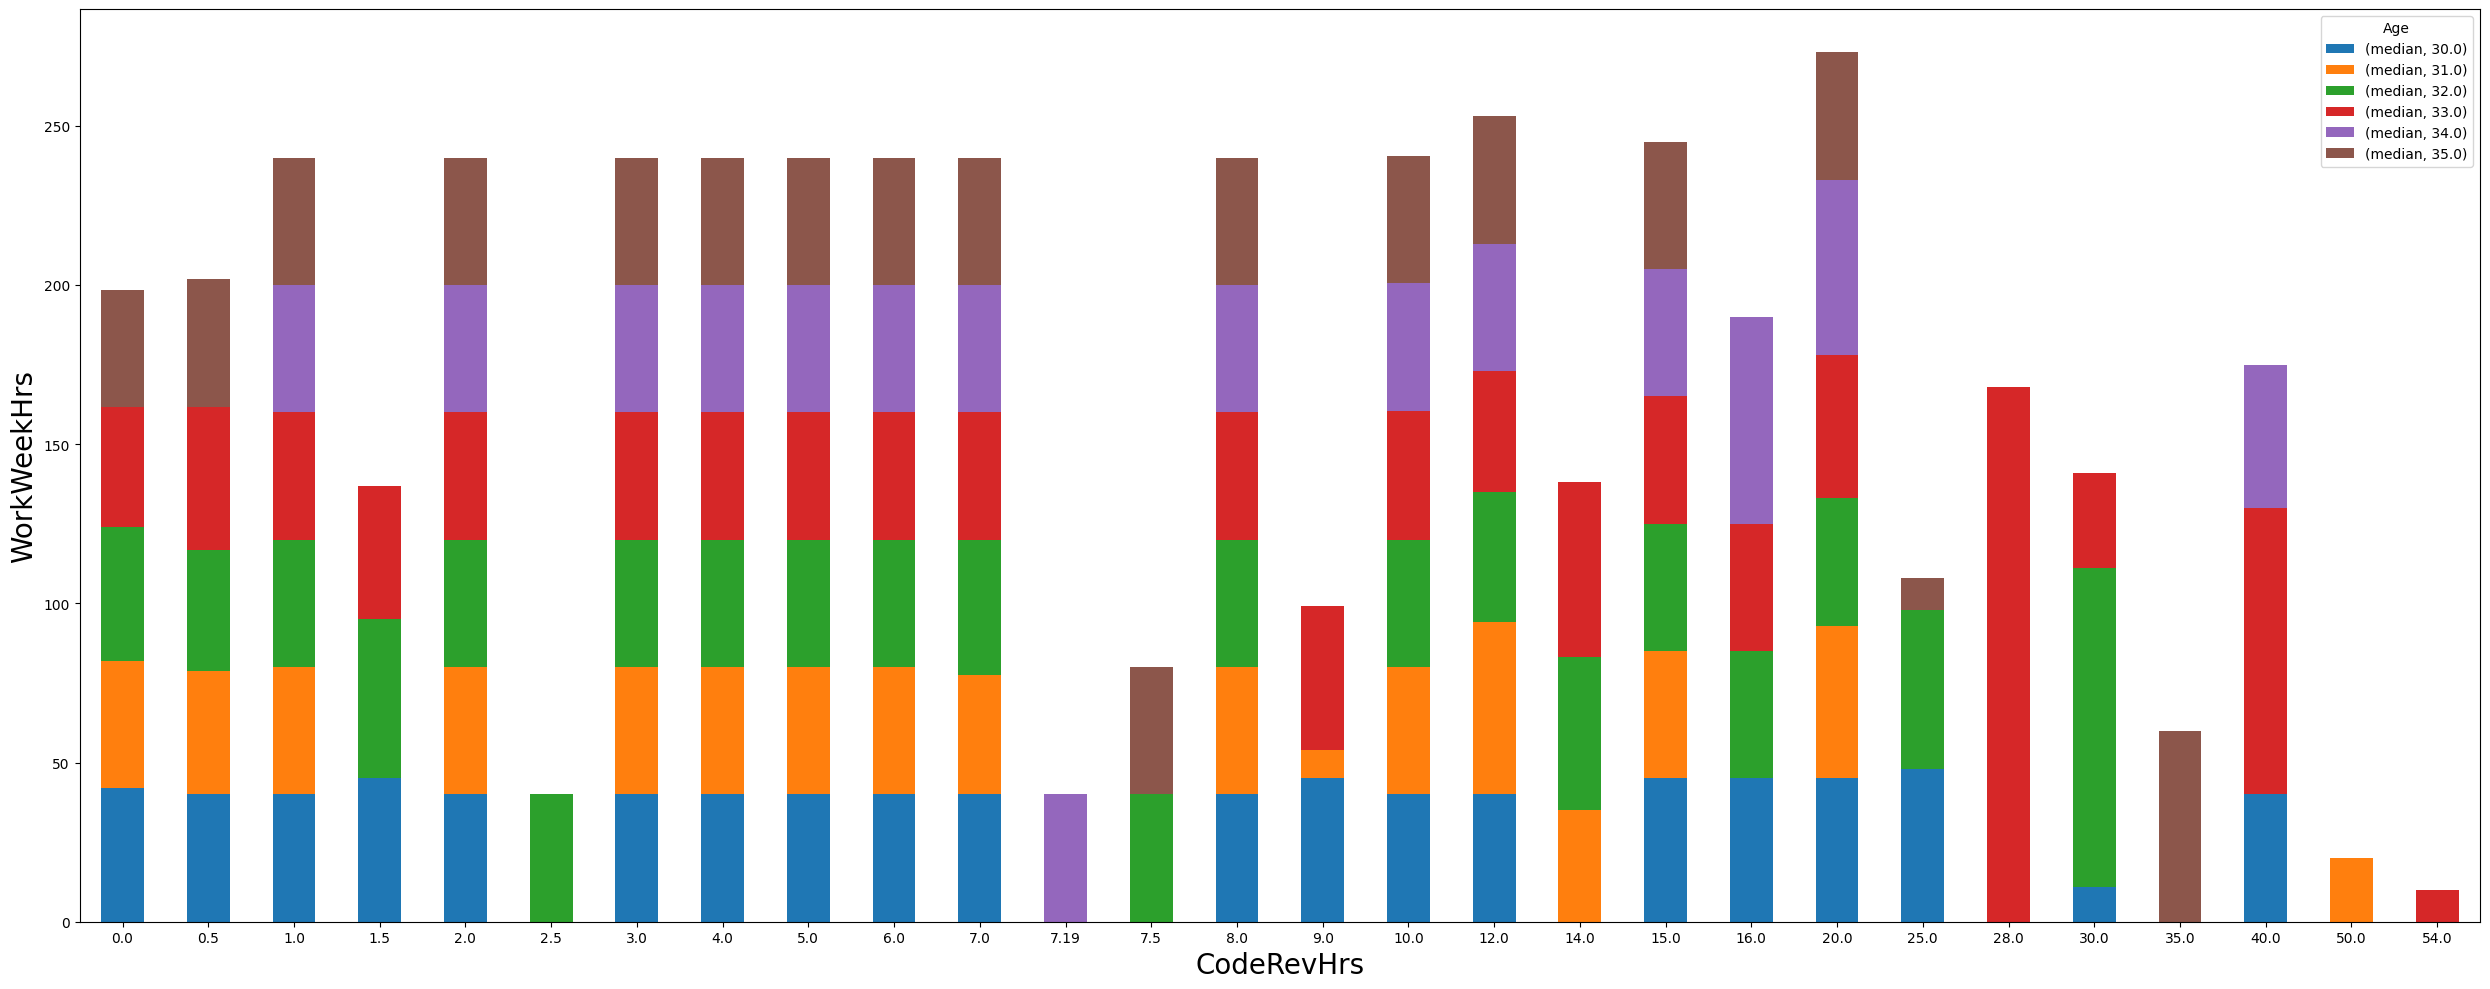

In [29]:
df_stacked_groups.plot(kind='bar', stacked=True, figsize=(25, 10))
plt.xlabel('CodeRevHrs', fontsize = 20)
plt.ylabel('WorkWeekHrs', fontsize = 20)
plt.legend(bbox_to_anchor=(1, 1), ncol=1, title='Age')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


In [30]:
# your code goes here
QUERY = """
SELECT ConvertedComp, Age
FROM master
WHERE (AGE >=45) AND (AGE<=60)
"""
df_line = pd.read_sql_query(QUERY,conn)
df_line



,ConvertedComp,Age
0,103000.0,47.0
1,NaN,54.0
2,54996.0,47.0
3,62807.0,47.0
4,72522.0,45.0
...,...,...
594,76339.0,45.0
595,68705.0,46.0
596,300000.0,48.0
597,87668.0,50.0


In [31]:
df_line_groups = df_line.groupby('Age').median()
df_line_groups

,ConvertedComp
Age,
45.0,90330.0
46.0,91593.0
47.0,91606.0
48.0,105750.0
49.0,85248.0
50.0,95000.0
51.0,100000.0
52.0,105500.0
53.0,100463.0


<Axes: xlabel='Age'>

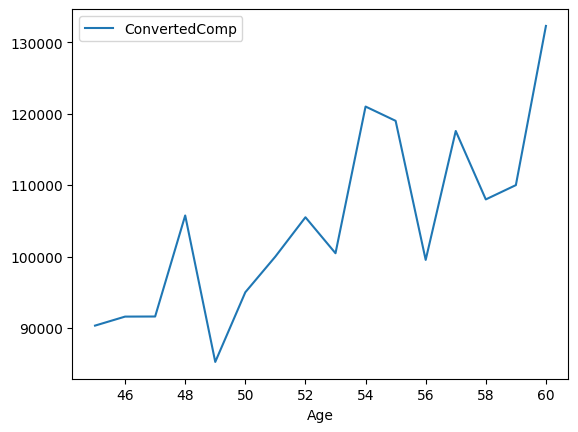

In [32]:
df_line_groups.plot()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


In [33]:
# your code goes here
QUERY = """
SELECT MainBranch, respondent
FROM master
"""
df_barh = pd.read_sql_query(QUERY,conn)

df_barh.head()



,MainBranch,Respondent
0,I am a developer by profession,4
1,I am a developer by profession,9
2,I am a developer by profession,13
3,I am a developer by profession,16
4,I am a developer by profession,17


In [34]:
df_barh_groups = df_barh.groupby('MainBranch').count()
df_barh_groups

,Respondent
MainBranch,
I am a developer by profession,10618
"I am not primarily a developer, but I write code sometimes as part of my work",780


<Axes: ylabel='MainBranch'>

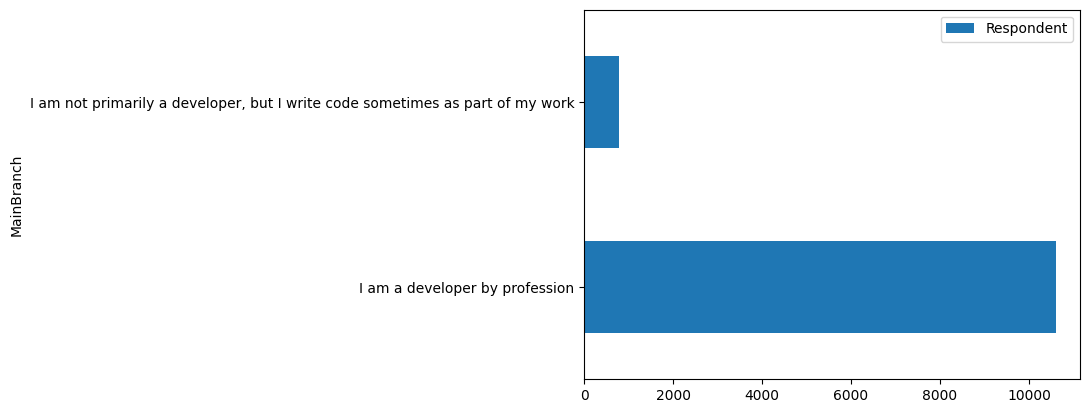

In [35]:
df_barh_groups.plot(kind='barh')

Close the database connection.


In [36]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
